## Project Stage - III (Distributions and Hypothesis Testing)

## Goals

The goal of Stage III is to develop advanced data for modeling for comparative analysis and hypothesis testing. 


### Tasks:

#### Task 1: Distribution Analysis (50 pts)     
- Member: (50 pts)
    - **M1.1** Compare NC and KY on Opioid Mortality - 2019 Data (20 pts)
         - Create histograms for NC and KY for Opioid Mortality (Normalized Mortality Rate)
         - Merge them into a single graph
         - Plot mean lines for both the histograms
         - Example below
         <img src="../img/example_hist.png" width=600 height=600 />
         
    - **M1.2** Evaluate a distribution for the Normalized Mortality Rate (20 pts)
        - Choose a distribution for Normalized Mortality Rate
            - Provide explanation of your choice
        - Develop distribution estimator with - Method of Moments (MoM), Maximum Likelihood (MLE), and Kernel Density Estimation (KDE)
        - Plot the distribution estimations over the histograms
            - Each should be color coded on the graph and described for their parameters
            - Discuss which estimator works the best and why
        - Example below
         <img src="../img/example_est.png" width=600 height=600 />
    - **M1.3** Select the top two states identified in Stage I and recreate the M1.2 task (10 pts)
         - Discuss the results

#### Task 2: Hypothesis Testing (50 pts)     
- Member: (50 pts)
    - **M2.1** Formulate Hypothesis for 5 identified variables in Stage 1 and test the hypothesis (25 pts)
        - For example, if your variable was `Premature death raw value`, divide the observations into two categories, high and low
            - Compare the distributions for a hypothesis test.
        - Formally state the Null and Alternative Hypothesis
        - Define the type of hypothesis and the thresholds
        - Conduct the test and discuss the results for all 5 variables
        
**Deliverable**
- Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Github Repository. 
- Discuss the results as a team. Put together a presentation of your findings, record it via zoom, and upload the recording to canvas.

*PS: Try to use `Plotly` for your charts. Will be useful in Stage V. As plotly graphs are intereactive they are not rendered properly in Github. You can use the approach here to render static images: https://plotly.com/python/static-image-export/. Submission to the repository should contain static images in the notebook.*

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import kde
import scipy.stats as stats
import plotly.graph_objects as go
from scipy.stats import poisson, multinomial, binom

<b> Importing the superdataset

In [2]:
data = pd.read_csv("../../../../data/stage_1/superdataset_merge.csv")
data

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,45001,32.4
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,22001,32.2
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,51001,19.4
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID,16001,60.8
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,"Yuba County, CA",6115,1468094,153,11.0,6,115,6115,CA,Yuba County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,6115,32.1
2523,"Yukon-Koyukuk Census Area, AK",2290,129587,14,11.0,2,290,2290,AK,Yukon-Koyukuk Census Area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,2290,1.2
2524,"Yuma County, AZ",4027,3964172,468,12.0,4,27,4027,AZ,Yuma County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZ,4027,24.6
2525,"Zapata County, TX",48505,284033,16,6.0,48,505,48505,TX,Zapata County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48505,3.8


<b> Filtering data for NC and KY state

In [3]:
data_nc = data[data["State"] == "NC"]
data_nc

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
20,"Alamance County, NC",37001,3109711,411,13.0,37,1,37001,NC,Alamance County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37001,34.2
29,"Alexander County, NC",37003,760950,121,16.0,37,3,37003,NC,Alexander County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37003,6.0
36,"Alleghany County, NC",37005,229301,25,11.0,37,5,37005,NC,Alleghany County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37005,39.9
60,"Anson County, NC",37007,544931,43,8.0,37,7,37007,NC,Anson County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37007,8.4
75,"Ashe County, NC",37009,552807,83,15.0,37,9,37009,NC,Ashe County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37009,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,"Wayne County, NC",37191,2518873,282,11.0,37,191,37191,NC,Wayne County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37191,41.9
2453,"Wilkes County, NC",37193,1432317,394,28.0,37,193,37193,NC,Wilkes County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37193,33.4
2465,"Wilson County, NC",37195,1657255,161,10.0,37,195,37195,NC,Wilson County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37195,34.0
2504,"Yadkin County, NC",37197,789496,127,16.0,37,197,37197,NC,Yadkin County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37197,28.6


In [4]:
data_ky = data[data["State"] == "KY"]
data_ky

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3
41,"Allen County, KY",21003,411770,54,13.0,21,3,21003,KY,Allen County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21003,44.5
50,"Anderson County, KY",21005,440394,77,17.0,21,5,21005,KY,Anderson County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21005,23.3
101,"Ballard County, KY",21007,172107,17,10.0,21,7,21007,KY,Ballard County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21007,4.5
114,"Barren County, KY",21009,871323,81,9.0,21,9,21009,KY,Barren County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21009,67.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,"Wayne County, KY",21231,429964,59,14.0,21,231,21231,KY,Wayne County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21231,105.5
2421,"Webster County, KY",21233,286195,28,10.0,21,233,21233,KY,Webster County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21233,46.8
2447,"Whitley County, KY",21235,755762,232,31.0,21,235,21235,KY,Whitley County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21235,160.5
2483,"Wolfe County, KY",21237,150925,49,32.0,21,237,21237,KY,Wolfe County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21237,79.1


<b> Plotting the histogram and mean lines for NC and KY using matplotlib

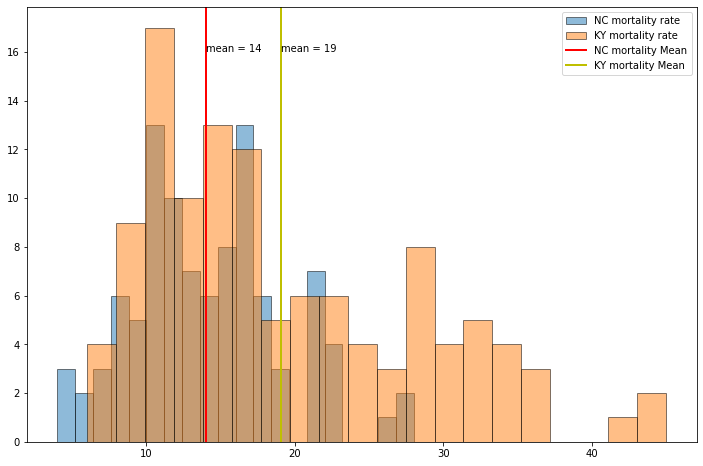

In [5]:
plt.figure(figsize=(12,8))

plt.hist(data_nc["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.5, label='NC mortality rate')
plt.hist(data_ky["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.5, label='KY mortality rate')

plt.axvline(data_nc["Norm_Deaths"].mean(), color='r', linewidth=2, label='NC mortality Mean') 
plt.text(data_nc["Norm_Deaths"].mean(), 16.0, 'mean = 14')

plt.axvline(data_ky["Norm_Deaths"].mean(), color='y',  linewidth=2, label='KY mortality Mean') 
plt.text(data_ky["Norm_Deaths"].mean(), 16.0, 'mean = 19')

plt.legend(loc='upper right')

plt.show()

## For NC and KY state:
### 1. Method of Moments

- Here I am using Poisson distribution to estimate the MOM, MLE and KDE distributions.<br>
- The reason for choosing poisson is poisson distribution gives probability of observing certain success in given interval of time. 
- We also have `Year` data in this dataset. We can check the probability of observing certain numbers of Norm_Deaths in a given interval of time.
- Another reason for choosing poisson distribution is that our distribution is discrete (Norm_Deaths values are non-continuous).
- I have also tried for binomial distribution but it didn't fit well as it has many parameters to figure out (k, n, p)

Here the linear space is generated using the min() and max() value for Norm_Deaths for NC and KY state. A discrete space is generated using range() function.

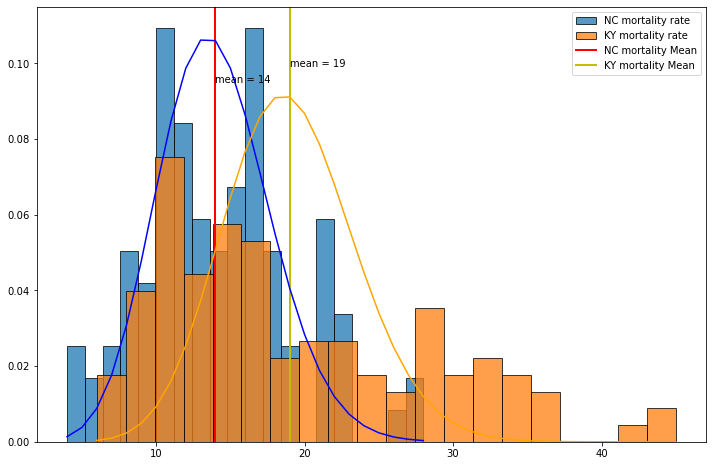

In [6]:
plt.figure(figsize=(12,8))
x1 = list(range(4, 29)) # min of data_nc.Norm_Deaths is 4 and max is 29
x2 = list(range(6, 46)) # min of data_ky.Norm_Deaths is 6 and max is 45

plt.hist(data_nc["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='NC mortality rate')
plt.hist(data_ky["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='KY mortality rate')

plt.axvline(data_nc["Norm_Deaths"].mean(), color='r', linewidth=2, label='NC mortality Mean') 
plt.text(data_nc["Norm_Deaths"].mean(),0.095, 'mean = 14')

plt.axvline(data_ky["Norm_Deaths"].mean(), color='y',  linewidth=2, label='KY mortality Mean') 
plt.text(data_ky["Norm_Deaths"].mean(), 0.099, 'mean = 19')

plt.plot(x1, poisson.pmf(x1, data_nc.Norm_Deaths.mean()), color = 'blue')
plt.plot(x2, poisson.pmf(x2, data_ky.Norm_Deaths.mean()), color = 'orange')
plt.legend(loc='upper right')

plt.show()

- In the above plot blue line represents MOM of NC state, while orange line represents MOM for KY state.
- Poisson distribution requires mean information to estimate the distribution which I have provided, also we need to take care of creation of discreate linear space instead of continuous linear space because out distribution is discrete.

Below is the link for MLE estimators for poisson distribution
* https://www.statlect.com/fundamentals-of-statistics/Poisson-distribution-maximum-likelihood
<br><br>
- The article provides the information of parameters we need for estimating MLE. The maximum likelihood estimator parameter is the mean which I have used to plot MLE. 

### 2. Maximum Likelihod Estimator

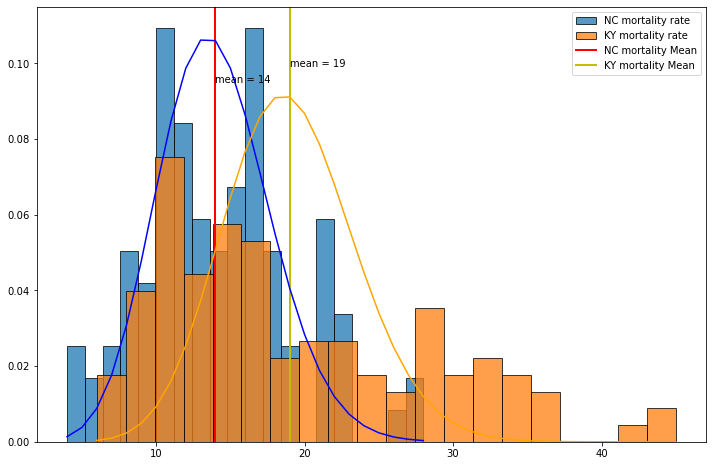

In [7]:
plt.figure(figsize=(12,8))
x1 = list(range(4, 29)) # min of data_nc.Norm_Deaths is 4 and max is 29
x2 = list(range(6, 46)) # min of data_ky.Norm_Deaths is 6 and max is 45

plt.hist(data_nc["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='NC mortality rate')
plt.hist(data_ky["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='KY mortality rate')

plt.axvline(data_nc["Norm_Deaths"].mean(), color='r', linewidth=2, label='NC mortality Mean') 
plt.text(data_nc["Norm_Deaths"].mean(),0.095, 'mean = 14')

plt.axvline(data_ky["Norm_Deaths"].mean(), color='y',  linewidth=2, label='KY mortality Mean') 
plt.text(data_ky["Norm_Deaths"].mean(), 0.099, 'mean = 19')

plt.plot(x1, poisson.pmf(x1, data_nc.Norm_Deaths.mean()), color = 'blue')
plt.plot(x2, poisson.pmf(x2, data_ky.Norm_Deaths.mean()), color = 'orange')
plt.legend(loc='upper right')

plt.show()

- In the above plot blue line represents MLE of NC state, while orange line represents MLE for KY state.

### 3. Kernel Density Estimators

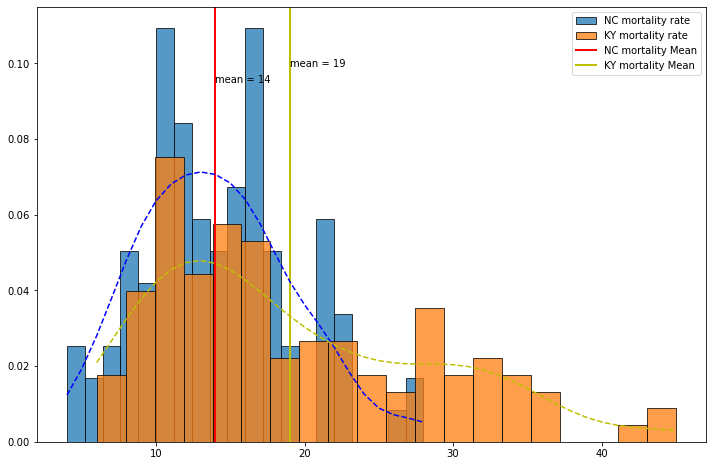

In [8]:
plt.figure(figsize=(12,8))
x1 = list(range(4, 29)) # min of data_nc.Norm_Deaths is 4 and max is 29
x2 = list(range(6, 46)) # min of data_ky.Norm_Deaths is 6 and max is 45

plt.hist(data_nc["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='NC mortality rate')
plt.hist(data_ky["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='KY mortality rate')

plt.axvline(data_nc["Norm_Deaths"].mean(), color='r', linewidth=2, label='NC mortality Mean') 
plt.text(data_nc["Norm_Deaths"].mean(),0.095, 'mean = 14')

plt.axvline(data_ky["Norm_Deaths"].mean(), color='y',  linewidth=2, label='KY mortality Mean') 
plt.text(data_ky["Norm_Deaths"].mean(), 0.099, 'mean = 19')

density1 = kde.gaussian_kde(data_nc.Norm_Deaths, bw_method=None)
density2 = kde.gaussian_kde(data_ky.Norm_Deaths, bw_method=None)

plt.legend(loc='upper right')
plt.plot(x1, density1(x1), 'b--')
plt.plot(x2, density2(x2), 'y--')

- In the above plot blue line represents KDE of NC state, while yellow line represents KDE for KY state.

### Calculating distribution estimators for top 2 states:

The list of top 10 states by mortality rate is:
<center><b>['KY', 'TN', 'TX', 'NC', 'VA', 'OH', 'GA', 'IN', 'WV', 'MO']</b></center> 
<br>
<br>I will take TN and TX states this time as KY has already considered.

In [9]:
data_tn = data[data["State"] == "TN"]
data_tn

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
52,"Anderson County, TN",47001,1555370,420,27.0,47,1,47001,TN,Anderson County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN,47001,71.3
141,"Bedford County, TN",47003,919663,123,13.0,47,3,47003,TN,Bedford County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN,47003,38.8
160,"Benton County, TN",47005,343832,98,28.0,47,5,47005,TN,Benton County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN,47005,49.6
189,"Bledsoe County, TN",47007,278107,30,11.0,47,7,47007,TN,Bledsoe County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN,47007,58.0
191,"Blount County, TN",47009,2522787,545,22.0,47,9,47009,TN,Blount County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN,47009,43.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,"Wayne County, TN",47181,355030,37,10.0,47,181,47181,TN,Wayne County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN,47181,72.5
2417,"Weakley County, TN",47183,720464,72,10.0,47,183,47183,TN,Weakley County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN,47183,89.3
2442,"White County, TN",47185,531917,78,15.0,47,185,47185,TN,White County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN,47185,28.3
2462,"Williamson County, TN",47187,3745591,309,8.0,47,187,47187,TN,Williamson County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN,47187,57.9


In [10]:
data_tx = data[data["State"] == "TX"]
data_tx

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
53,"Anderson County, TX",48001,1199171,184,15.0,48,1,48001,TX,Anderson County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48001,39.4
55,"Andrews County, TX",48003,317557,19,6.0,48,3,48003,TX,Andrews County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48003,19.5
57,"Angelina County, TX",48005,1781154,153,9.0,48,5,48005,TX,Angelina County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48005,64.0
65,"Aransas County, TX",48007,495994,91,18.0,48,7,48007,TX,Aransas County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48007,21.4
67,"Archer County, TX",48009,186164,19,10.0,48,9,48009,TX,Archer County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48009,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,"Wise County, TX",48497,1227845,103,8.0,48,497,48497,TX,Wise County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48497,39.4
2485,"Wood County, TX",48499,866267,88,10.0,48,499,48499,TX,Wood County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48499,33.8
2521,"Young County, TX",48503,380306,65,17.0,48,503,48503,TX,Young County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48503,43.9
2525,"Zapata County, TX",48505,284033,16,6.0,48,505,48505,TX,Zapata County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48505,3.8


## For TN and TX state:
### Method of Moments (MOM)

In [11]:
# figuring out min and max values for generating a discrete linear space
print(data_tn["Norm_Deaths"].min(), data_tn["Norm_Deaths"].max())
print(data_tx["Norm_Deaths"].min(), data_tx["Norm_Deaths"].max())

6.0 31.0
1.0 23.0


In [12]:
data_tn["Norm_Deaths"].mean(),data_tx["Norm_Deaths"].mean()

(17.24468085106383, 8.335227272727273)

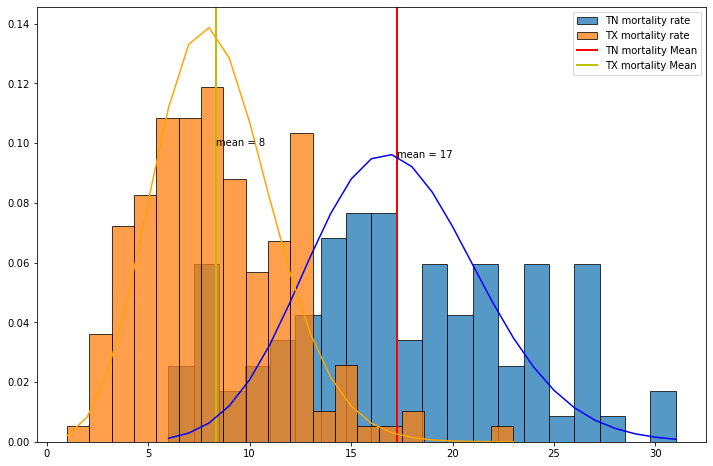

In [13]:
plt.figure(figsize=(12,8))
x1 = list(range(6, 32)) # min of data_tn.Norm_Deaths is 6 and max is 31
x2 = list(range(1, 24)) # min of data_tx.Norm_Deaths is 1 and max is 23

plt.hist(data_tn["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='TN mortality rate')
plt.hist(data_tx["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='TX mortality rate')

plt.axvline(data_tn["Norm_Deaths"].mean(), color='r', linewidth=2, label='TN mortality Mean') 
plt.text(data_tn["Norm_Deaths"].mean(),0.095, 'mean = 17')

plt.axvline(data_tx["Norm_Deaths"].mean(), color='y',  linewidth=2, label='TX mortality Mean') 
plt.text(data_tx["Norm_Deaths"].mean(), 0.099, 'mean = 8')

plt.plot(x1, poisson.pmf(x1, data_tn.Norm_Deaths.mean()), color = 'blue')
plt.plot(x2, poisson.pmf(x2, data_tx.Norm_Deaths.mean()), color = 'orange')
plt.legend(loc='upper right')

plt.show()

- In the above plot blue line represents the MOM for TN state and orange line represents MOM for TX state

### 2. Maximum Likeliood Estimator:

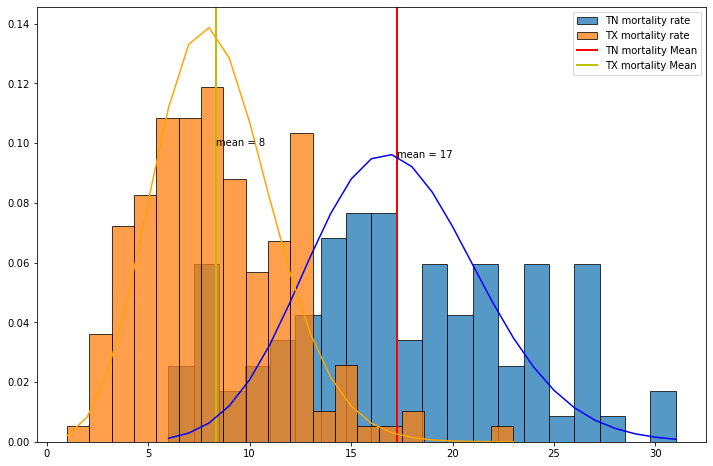

In [14]:
plt.figure(figsize=(12,8))
x1 = list(range(6, 32)) # min of data_tn.Norm_Deaths is 6 and max is 31
x2 = list(range(1, 24)) # min of data_tx.Norm_Deaths is 1 and max is 23

plt.hist(data_tn["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='TN mortality rate')
plt.hist(data_tx["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='TX mortality rate')

plt.axvline(data_tn["Norm_Deaths"].mean(), color='r', linewidth=2, label='TN mortality Mean') 
plt.text(data_tn["Norm_Deaths"].mean(),0.095, 'mean = 17')

plt.axvline(data_tx["Norm_Deaths"].mean(), color='y',  linewidth=2, label='TX mortality Mean') 
plt.text(data_tx["Norm_Deaths"].mean(), 0.099, 'mean = 8')

plt.plot(x1, poisson.pmf(x1, data_tn.Norm_Deaths.mean()), color = 'blue')
plt.plot(x2, poisson.pmf(x2, data_tx.Norm_Deaths.mean()), color = 'orange')
plt.legend(loc='upper right')

plt.show()

In the above plot blue line represents MLE of TN state, while orange line represents MLE for TX state.

### 4. Kernel Density Estimator

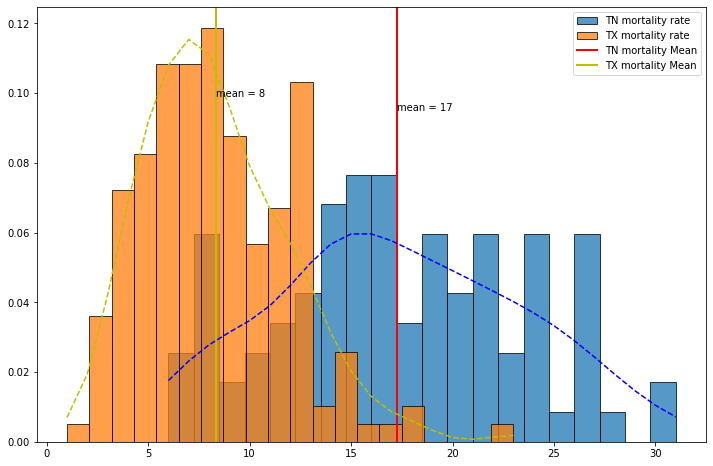

In [15]:
plt.figure(figsize=(12,8))
x1 = list(range(6, 32)) # min of data_tn.Norm_Deaths is 6 and max is 31
x2 = list(range(1, 24)) # min of data_ky.Norm_Deaths is 1 and max is 23


plt.hist(data_tn["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='TN mortality rate')
plt.hist(data_tx["Norm_Deaths"], bins=20, density= True, edgecolor='k', alpha=0.75, label='TX mortality rate')

plt.axvline(data_tn["Norm_Deaths"].mean(), color='r', linewidth=2, label='TN mortality Mean') 
plt.text(data_tn["Norm_Deaths"].mean(),0.095, 'mean = 17')

plt.axvline(data_tx["Norm_Deaths"].mean(), color='y',  linewidth=2, label='TX mortality Mean') 
plt.text(data_tx["Norm_Deaths"].mean(), 0.099, 'mean = 8')

density1 = kde.gaussian_kde(data_tn.Norm_Deaths, bw_method=None)
density2 = kde.gaussian_kde(data_tx.Norm_Deaths, bw_method=None)
#xgrid = np.linspace(x1.min(), x1.max(), 100)

plt.legend(loc='upper right')
plt.plot(x1, density1(x1), 'b--')
plt.plot(x2, density2(x2), 'y--')

In the above plot blue line represents KDE of TN state, while orange line represents KDE for TX state.

## Task 2: Hypothesis Testing

<b> The 5 variables are: </b>
- opioid dispensing rate
- unemployment rate
- drug overdose
- insufficient sleep
- excessive drinking

</t> Here we will perform hypothesis testing of these variables with NORM DEATHS and figure out if some relationship exists between them or not.

- Normalizing the data of 5 variables by population before performing hypotesis testing. Here, we have also taken care of inf and nan values and have replaced with relevant values
  

In [16]:
data["Norm_ODR"] = (data.Opiod_Dispensing_Rate/data["Population"])*100000

In [17]:
data["Norm_Unemployment"] = (data["Unemployment raw value"]/data["Population"])*100000

In [18]:
data["Norm_Drug_Overdose"] = (data["Drug overdose deaths raw value"]/data["Population"])*100000

In [19]:
data["Norm_insufficient_sleep"] = (data["Insufficient sleep raw value"]/data["Population"])*100000

In [20]:
data["Norm_excessive_drinking"] = (data["Excessive drinking raw value"]/data["Population"])*100000

Checking for null values

In [21]:
print("Null values in Norm_ODR: ",data["Norm_ODR"].isna().sum())
print("Null values in Norm_Unemployment: ",data["Norm_Unemployment"].isna().sum())
print("Null values in Norm_Drug_Overdose: ",data["Norm_Drug_Overdose"].isna().sum())
print("Null values in Norm_insufficient_sleep: ",data["Norm_insufficient_sleep"].isna().sum())
print("Null values in Norm_excessive_drinking: ",data["Norm_excessive_drinking"].isna().sum())

Null values in Norm_ODR:  0
Null values in Norm_Unemployment:  0
Null values in Norm_Drug_Overdose:  807
Null values in Norm_insufficient_sleep:  0
Null values in Norm_excessive_drinking:  0


<b>Replacing all null values with relevant values (median) so it doesn't distort hypothesis testing result:

In [22]:
data["Norm_Drug_Overdose"] = data["Norm_Drug_Overdose"].fillna(data["Norm_Drug_Overdose"].quantile(q=0.5))

In [23]:
data.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate,Norm_ODR,Norm_Unemployment,Norm_Drug_Overdose,Norm_insufficient_sleep,Norm_excessive_drinking
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,SC,45001,32.4,6.051675,0.008560,3.258113,0.067397,0.029146
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,LA,22001,32.2,2.516162,0.004617,1.081764,0.025285,0.014885
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,VA,51001,19.4,2.671481,0.006640,1.538371,0.050607,0.020851
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,NaN,NaN,ID,16001,60.8,0.752154,0.000344,0.169568,0.003253,0.002389
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,KY,21001,71.3,18.378657,0.016322,1.374150,0.093850,0.037489


- I have performed paired T-test for hypothesis testing

### Hypothesis Test 1. Norm Deaths vs Opiod dispensing rate
<br><br>

**Null Hypothesis H0:** There is no significant difference between Norm_Deaths value generated by high and low opiod dispensing rate.<br>
**Alternative Hypothesis H1:** Norm_Deaths values generated by high and low opiod dispensing rates differ significantly.

- Here, we'll perform PAIRED T-TEST to check if significant difference exists between the values of same column given some threshold/criteria.
- We are using the criteria of high/low values for each of 5 variables and comparing the corresponding values of NORM_DEATHS.
- We make use of the main dataframe which is at county level. 
- The threshold value is chosen at 50% quartile.

Let's determine a value to split the Norm_ODR value into 2 groups (high/low). I am using quantile function to do that and split the data at quantile = 0.5.
- All values less than quantile = 0.5 are provided with label `low` while all values higher than quantile = 0.5 are provided with label `high`.

In [24]:
data["Norm_ODR"].quantile(q=0.5)

4.13359090947436

Create 2 different datasets based on quantile values.

In [25]:
# creating a new dataframe with all values less than quantile mentioned and assigning a label column to it
odr_low = data[data["Norm_ODR"] <4.13359090947436].assign(Norm_ODR_label = "low")

#Selecting only the required columns
odr_low = odr_low[["Norm_Deaths","Norm_ODR_label"]]
odr_low

,Norm_Deaths,Norm_ODR_label
1,19.0,low
2,11.0,low
3,12.0,low
7,17.0,low
9,6.0,low
...,...,...
2522,11.0,low
2523,11.0,low
2524,12.0,low
2525,6.0,low


In [26]:
# creating a new dataframe with all values higher than quantile mentioned and assigning a label column to it
odr_high = data[data["Norm_ODR"] > 4.13359090947436].assign(Norm_ODR_label = "high")

#Selecting only the required columns
odr_high = odr_high[["Norm_Deaths","Norm_ODR_label"]]
odr_high

,Norm_Deaths,Norm_ODR_label
0,7.0,high
4,11.0,high
5,6.0,high
6,12.0,high
8,9.0,high
...,...,...
2508,21.0,high
2509,4.0,high
2513,9.0,high
2517,4.0,high


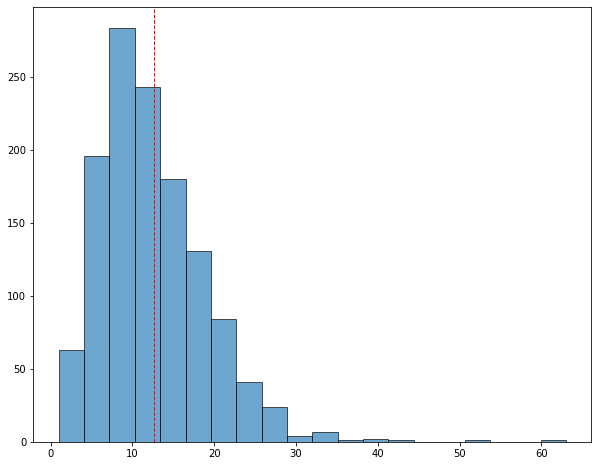

In [27]:
#ploting the histogram of odr_low with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(odr_low["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(odr_low["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

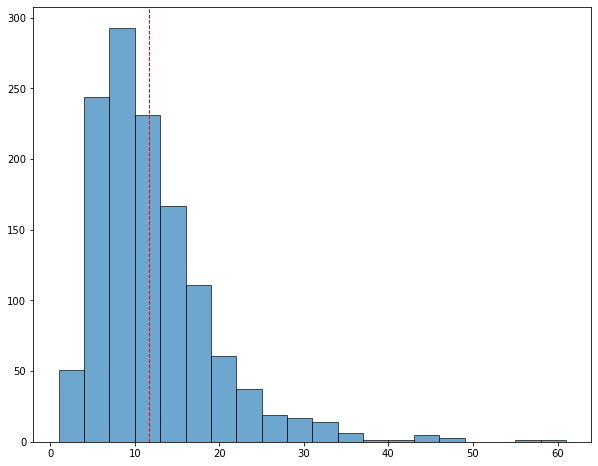

In [28]:
#ploting the histogram of odr_high with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(odr_high["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(odr_high["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

<b> Performing a paired t-test using `stats.ttest_rel()` and comparing Norm Deaths value of both groups to check for difference/similarity.

In [29]:
stats.ttest_rel(a = odr_low["Norm_Deaths"],
                b = odr_high["Norm_Deaths"])

Ttest_relResult(statistic=3.345469704510835, pvalue=0.0008455792999610596)

The p-value in the test output shows the chances of observing this senario is 0.08 % which is less than 5 %.
So we can **reject** the Null hypothesis.

<br></br>

<center><h5>End Result: Norm_Deaths values generated by high and low opiod dispensing rates differs significantly.</h5></center>


### Hypothesis Test 2. Norm Deaths vs Unemployment rate
<br><br>

**Null Hypothesis H0:** There is no significant difference between Norm_Deaths value generated by high and low unemployment rate.<br>
**Alternative Hypothesis H1:** Norm_Deaths values generated by high and low unemployment rates differ significantly.

Let's determine a value to split the Norm_Unemployment value into 2 groups (high/low). I am using quantile function to do that and split the data at quantile = 0.5

In [30]:
data["Norm_Unemployment"].quantile(q=0.5)

0.005999736892206954

Create 2 different datasets based on quantile values.

In [31]:
# creating a new dataframe with all values less than quantile mentioned and assigning a label column to it
umeploy_low = data[data["Norm_Unemployment"] <0.005999736892206954].assign(Norm_UNEMP_label = "low")

#Selecting only the required columns
umeploy_low = umeploy_low[["Norm_Deaths","Norm_UNEMP_label"]]
umeploy_low

,Norm_Deaths,Norm_UNEMP_label
1,19.0,low
3,12.0,low
7,17.0,low
8,9.0,low
9,6.0,low
...,...,...
2518,15.0,low
2519,14.0,low
2520,7.0,low
2522,11.0,low


In [32]:
# creating a new dataframe with all values high than quantile mentioned and assigning a label column to it
umeploy_high = data[data["Norm_Unemployment"] > 0.005999736892206954].assign(Norm_UNEMP_label = "high")

#Selecting only the required columns
umeploy_high = umeploy_high[["Norm_Deaths","Norm_UNEMP_label"]]
umeploy_high

,Norm_Deaths,Norm_UNEMP_label
0,7.0,high
2,11.0,high
4,11.0,high
5,6.0,high
6,12.0,high
...,...,...
2517,4.0,high
2521,17.0,high
2523,11.0,high
2525,6.0,high


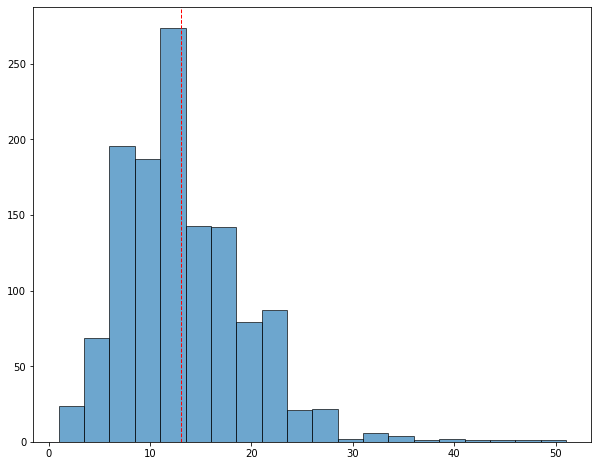

In [33]:
#ploting the histogram of umeploy_low with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(umeploy_low["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(umeploy_low["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

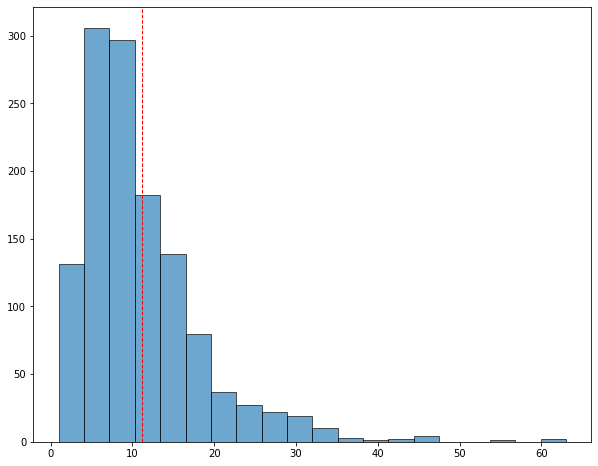

In [34]:
#ploting the histogram of umeploy_high with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(umeploy_high["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(umeploy_high["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

Performing paired t-test:

In [35]:
stats.ttest_rel(a = umeploy_low["Norm_Deaths"],
                b = umeploy_high["Norm_Deaths"])

Ttest_relResult(statistic=6.901250968174368, pvalue=8.138581534125101e-12)

The p-value in the test output shows the chances of observing this senario is very less than 5 % (signifance level = 0.05).
So we can **reject** the Null hypothesis.

<br></br>

<center><h5>End Result: Norm_Deaths values generated by high and low unemployment rates differs significantly..</h5></center>


### Hypothesis Test 3. Norm Deaths vs Drug overdose rate
<br><br>

**Null Hypothesis H0:** There is no significant difference between Norm_Deaths value generated by high and low drug overdose rate.<br>
**Alternative Hypothesis H1:** Norm_Deaths values generated by high and low drug overdose rates differ significantly.

Let's determine a value to split the Norm_Drug_Overdose value into 2 groups (high/low). I am using quantile function to do that and split the data at quantile = 0.5

In [36]:
data["Norm_Drug_Overdose"].quantile(q=0.5)

1.3741496107775855

Create 2 different datasets based on quantile values.

In [37]:
# creating a new dataframe with all values less than quantile mentioned and assigning a label column to it
overdose_low = data[data["Norm_Drug_Overdose"] <= 1.3741496107775855].assign(Norm_overdose_label = "low")

#Selecting only the required columns
overdose_low = overdose_low[["Norm_Deaths","Norm_overdose_label"]]
overdose_low

,Norm_Deaths,Norm_overdose_label
1,19.0,low
3,12.0,low
4,11.0,low
7,17.0,low
8,9.0,low
...,...,...
2522,11.0,low
2523,11.0,low
2524,12.0,low
2525,6.0,low


In [38]:
# creating a new dataframe with all values less than quantile mentioned and assigning a label column to it
overdose_high = data[data["Norm_Drug_Overdose"] >= 1.3741496107775855].assign(Norm_overdose_label = "high")

#Selecting only the required columns
overdose_high = overdose_high[["Norm_Deaths","Norm_overdose_label"]]
overdose_high

,Norm_Deaths,Norm_overdose_label
0,7.0,high
2,11.0,high
4,11.0,high
5,6.0,high
6,12.0,high
...,...,...
2517,4.0,high
2521,17.0,high
2523,11.0,high
2525,6.0,high


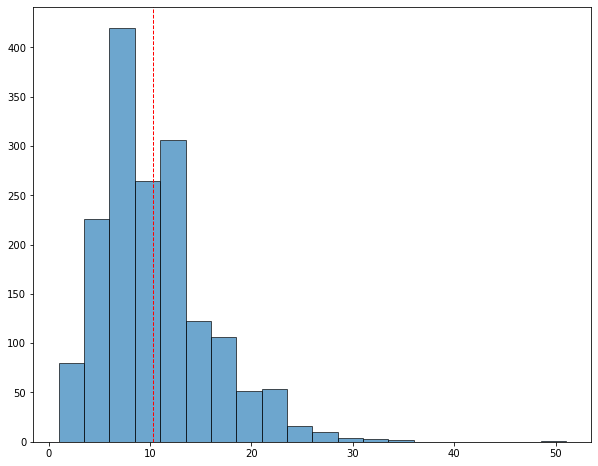

In [39]:
#ploting the histogram of overdose_low with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(overdose_low["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(overdose_low["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

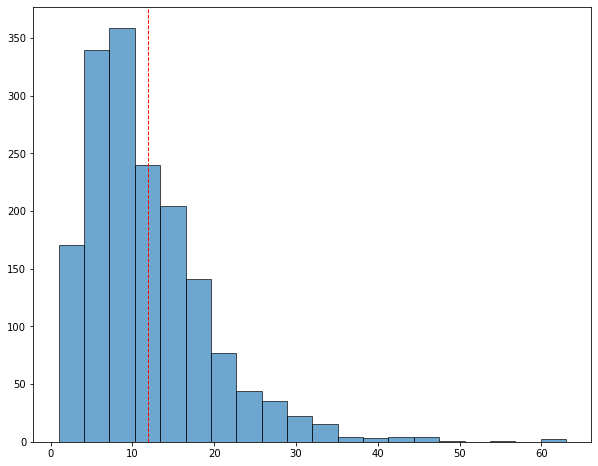

In [40]:
#ploting the histogram of overdose_high with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(overdose_high["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(overdose_high["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

In [41]:
stats.ttest_rel(a = overdose_low["Norm_Deaths"],
                b = overdose_high["Norm_Deaths"])

Ttest_relResult(statistic=-7.420285506958049, pvalue=1.8536453875484152e-13)

The p-value in the test output shows the chances of observing this senario is very less than 5 % (signifance level = 0.05).
So we can **reject** the Null hypothesis.

<br></br>

<center><h5>End Result:  Norm_Deaths values generated by high and low drug overdose rates differ significantly. </h5></center>


### Hypothesis Test 4. Norm Deaths vs Insufficient sleep rate
<br><br>

**Null Hypothesis H0:** There is no significant difference between Norm_Deaths value generated by high and low insufficient sleep rate.<br>
**Alternative Hypothesis H1:** Norm_Deaths values generated by high and low insufficient sleep rates differ significantly.

Let's determine a value to split the Norm_insufficient_sleep value into 2 groups (high/low). I am using quantile function to do that and split the data at quantile = 0.5

In [42]:
data["Norm_insufficient_sleep"].quantile(q=0.5)

0.04419928305573272

Create 2 different datasets based on quantile values.

In [43]:
# creating a new dataframe with all values less than quantile mentioned and assigning a label column to it
sleep_low = data[data["Norm_insufficient_sleep"] < 0.04419928305573272].assign(sleep_label = "low")

#Selecting only the required columns
sleep_low = sleep_low[["Norm_Deaths","sleep_label"]]
sleep_low

,Norm_Deaths,sleep_label
1,19.0,low
3,12.0,low
7,17.0,low
8,9.0,low
13,10.0,low
...,...,...
2518,15.0,low
2519,14.0,low
2520,7.0,low
2522,11.0,low


In [44]:
# creating a new dataframe with all values higher than quantile mentioned and assigning a label column to it
sleep_high = data[data["Norm_insufficient_sleep"] > 0.04419928305573272].assign(sleep_label = "high")

#Selecting only the required columns
sleep_high = sleep_high[["Norm_Deaths","sleep_label"]]
sleep_high

,Norm_Deaths,sleep_label
0,7.0,high
2,11.0,high
4,11.0,high
5,6.0,high
6,12.0,high
...,...,...
2517,4.0,high
2521,17.0,high
2523,11.0,high
2525,6.0,high


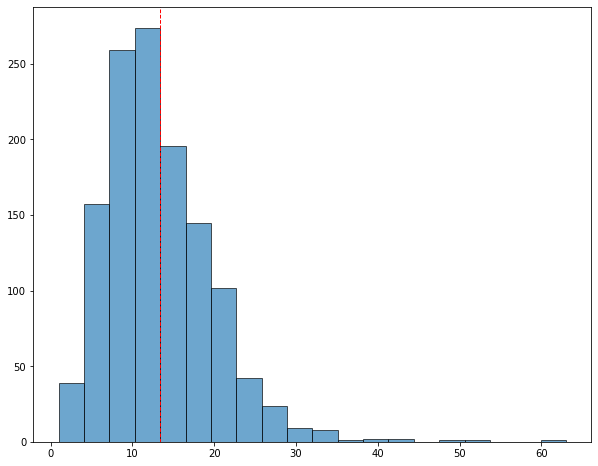

In [45]:
#ploting the histogram of sleep_low with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(sleep_low["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(sleep_low["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

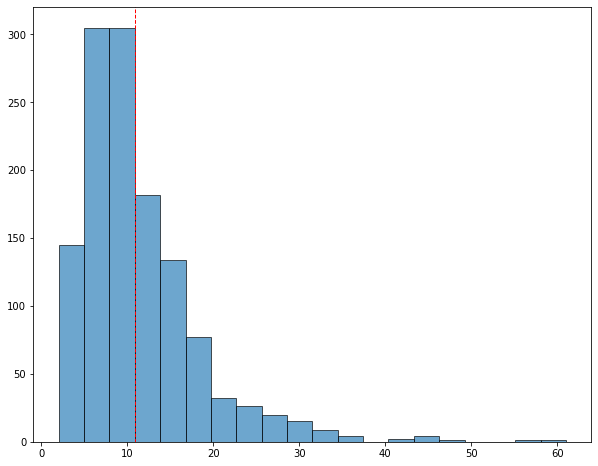

In [46]:
#ploting the histogram of sleep_high with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(sleep_high["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(sleep_high["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

In [47]:
stats.ttest_rel(a = sleep_low["Norm_Deaths"],
                b = sleep_high["Norm_Deaths"])

Ttest_relResult(statistic=9.338856818294737, pvalue=4.252334546478409e-20)

The p-value in the test output shows the chances of observing this senario is very less than 5 % (signifance level = 0.05).
So we can **reject** the Null hypothesis.

<br></br>

<center><h5>End Result:  Norm_Deaths values generated by high and low insufficient sleep rates differ significantly. </h5></center>


### Hypothesis Test 5. Norm Deaths vs Excessive Drinking rate
<br><br>

**Null Hypothesis H0:** There is no significant difference between Norm_Deaths value generated by high and low excessive drinking rate.<br>
**Alternative Hypothesis H1:** Norm_Deaths values generated by high and low excessive drinking rates differ significantly.

Let's determine a value to split the Norm_excessive_drinking value into 2 groups (high/low). I am using quantile function to do that and split the data at quantile = 0.5

In [48]:
data["Norm_excessive_drinking"].quantile(q = 0.5)

0.022425326053363552

Create 2 different datasets based on quantile values.

In [49]:
# creating a new dataframe with all values less than quantile mentioned and assigning a label column to it
drink_low = data[data["Norm_excessive_drinking"] < 0.022425326053363552].assign(drink_label = "low")

#Selecting only the required columns
drink_low = drink_low[["Norm_Deaths","drink_label"]]
drink_low

,Norm_Deaths,drink_label
1,19.0,low
2,11.0,low
3,12.0,low
7,17.0,low
8,9.0,low
...,...,...
2518,15.0,low
2519,14.0,low
2520,7.0,low
2522,11.0,low


In [50]:
# creating a new dataframe with all values high than quantile mentioned and assigning a label column to it
drink_high = data[data["Norm_excessive_drinking"] > 0.022425326053363552].assign(drink_label = "high")

#Selecting only the required columns
drink_high = drink_high[["Norm_Deaths","drink_label"]]
drink_high

,Norm_Deaths,drink_label
0,7.0,high
4,11.0,high
5,6.0,high
6,12.0,high
9,6.0,high
...,...,...
2517,4.0,high
2521,17.0,high
2523,11.0,high
2525,6.0,high


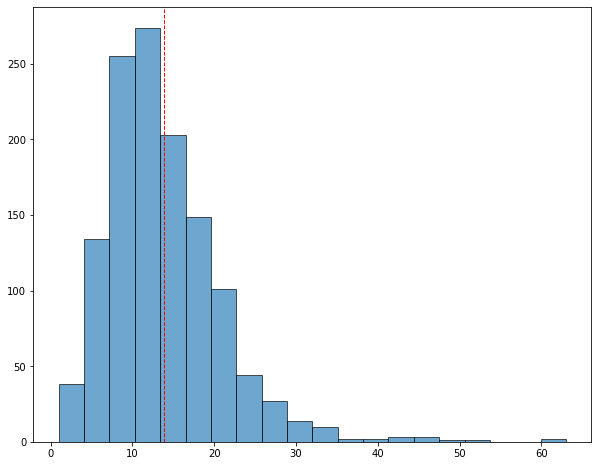

In [51]:
#ploting the histogram of drink_low with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(drink_low["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(drink_low["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

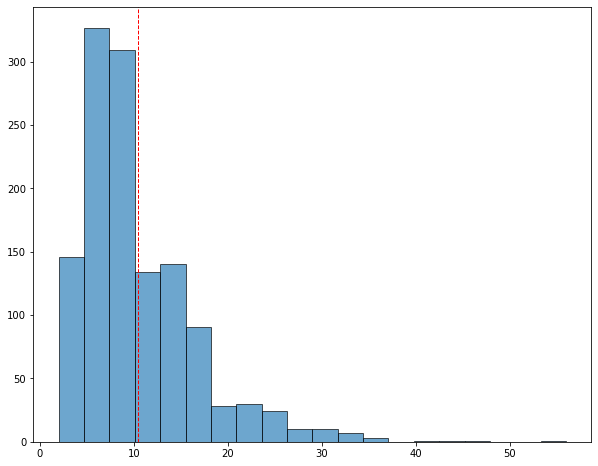

In [52]:
#ploting the histogram of drink_high with mean line to see the distribution
plt.figure(figsize=(10,8))
plt.hist(drink_high["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.65)
plt.axvline(drink_high["Norm_Deaths"].mean(), color='r', linestyle='dashed', linewidth=1)

In [53]:
stats.ttest_rel(a = drink_low["Norm_Deaths"],
                b = drink_high["Norm_Deaths"])

Ttest_relResult(statistic=13.31753820345251, pvalue=5.857616488124665e-38)

The p-value in the test output shows the chances of observing this senario is very less than 5 % (signifance level = 0.05).
So we can **reject** the Null hypothesis.

<br></br>

<center><h5>End Result: Norm_Deaths values generated by high and low excessive drinking rates differ significantly. </h5></center>
